In [2]:
import os
import numpy as np
import pandas as pd 
import tensorflow as tf
import cv2

In [3]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Rescaling, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
DATA_PATH = '/kaggle/input/alphabetsarabicsl/AlphabetsArabicSL'
CATEGORIES = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
              'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
              'y', 'z', 'zz', 'zzz']
lmap = {'a': 'ا', 'b': 'ب', 'c': 'ت', 'd': 'ث', 'e': 'ج', 'f': 'ح',
        'g': 'خ', 'h': 'د','i': 'ذ', 'j': 'ر', 'k': 'ز', 'l': 'س',
        'm': 'ش', 'n': 'ص', 'o':'ض', 'p': 'ط', 'q': 'ظ', 
        'r': 'ع', 's': 'غ', 't': 'ف', 'u': 'ق', 'v':'ك', 
        'w':'ل', 'x': 'م','y': 'ن', 'z': 'ه', 'zz': 'و', 'zzz': 'ي'}
ar_alphabet = ['ا', 'ب', 'ت', 'ث', 'ج', 'ح','خ', 'د','ذ', 'ر', 'ز', 'س',
        'ش', 'ص','ض', 'ط', 'ظ','ع', 'غ', 'ف', 'ق','ك','ل', 'م','ن', 'ه', 'و','ي']
# IMG_WIDTH = 135
# IMG_HEIGHT=240
IMG_WIDTH = 64
IMG_HEIGHT=120

In [5]:
video = cv2.VideoCapture('/kaggle/input/alphabetsarabicsl/AlphabetsArabicSL/a/VID20221203120156.mp4')
ret, frame = video.read()
frame.shape

(1920, 1080, 3)

In [6]:
X = []
y = []
count = []

def create_training_data():
    for category in CATEGORIES:
        k=0
        path = os.path.join(DATA_PATH, category)
        class_num = CATEGORIES.index(category)
        for vid in os.listdir(path):
            cap = cv2.VideoCapture(os.path.join(path, vid))
            while True:
                ret, frame = cap.read()
                if not ret:
                        break
                frame = cv2.resize(frame, (IMG_WIDTH, IMG_HEIGHT))
                frame = frame[:, :, [2, 1, 0]]
                X.append(frame)
#                 X.append(frame/255)
                y.append(class_num)
                k += 1
            cap.release()
        print(class_num, end=' ')
        count.append([class_num, k])
        
create_training_data()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 

In [7]:
print(len(X))
print(len(y))
print(count)

44123
44123
[[0, 1577], [1, 1561], [2, 1577], [3, 1588], [4, 1618], [5, 1619], [6, 1593], [7, 1515], [8, 1514], [9, 1605], [10, 1571], [11, 1532], [12, 1564], [13, 1573], [14, 1584], [15, 1511], [16, 1620], [17, 1526], [18, 1563], [19, 1581], [20, 1586], [21, 1544], [22, 1418], [23, 1546], [24, 1741], [25, 1582], [26, 1621], [27, 1693]]


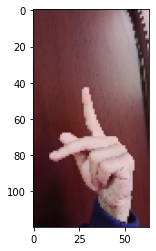

In [14]:
from matplotlib import pyplot as plt
plt.imshow(X[1000])
plt.show()

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
print("The shape of X is : ", X.shape)
print("The shape of y is : ", y.shape)

The shape of X is :  (44123, 120, 64, 3)
The shape of y is :  (44123,)


In [11]:
from sklearn.utils import shuffle
X, y =shuffle(X,y,random_state=20)

In [12]:
X_train, X_split, y_train, y_splitt = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
print(X_train.shape)
print(X_split.shape)
print(y_train.shape)
print(y_splitt.shape)

(30886, 120, 64, 3)
(13237, 120, 64, 3)
(30886,)
(13237,)


In [16]:
X_test, X_valid, y_test, y_valid = train_test_split(X_split, y_splitt, test_size=0.50, random_state=42)

In [17]:
y_train = to_categorical(y_train,28)
y_test = to_categorical(y_test,28)
y_valid = to_categorical(y_valid,28)

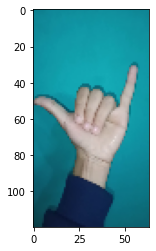

In [18]:
plt.imshow(X_train[200])
plt.show()

In [37]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))


model.add(Dense(28, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 116, 60, 32)       2432      
_________________________________________________________________
activation_6 (Activation)    (None, 116, 60, 32)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 58, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 28, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 56, 28, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 12, 64)       

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [39]:
his=model.fit(X_train, y_train,epochs=50,batch_size=128,verbose=2,validation_data=(X_valid, y_valid),callbacks=[early_stop])

Epoch 1/50
242/242 - 5s - loss: 1.9051 - accuracy: 0.7406 - precision_2: 0.9084 - recall_2: 0.6829 - val_loss: 0.1214 - val_accuracy: 0.9633 - val_precision_2: 0.9671 - val_recall_2: 0.9585
Epoch 2/50
242/242 - 4s - loss: 0.0474 - accuracy: 0.9866 - precision_2: 0.9880 - recall_2: 0.9851 - val_loss: 0.0542 - val_accuracy: 0.9879 - val_precision_2: 0.9890 - val_recall_2: 0.9872
Epoch 3/50
242/242 - 4s - loss: 0.0166 - accuracy: 0.9960 - precision_2: 0.9962 - recall_2: 0.9957 - val_loss: 0.0076 - val_accuracy: 0.9985 - val_precision_2: 0.9985 - val_recall_2: 0.9985
Epoch 4/50
242/242 - 4s - loss: 0.0171 - accuracy: 0.9949 - precision_2: 0.9950 - recall_2: 0.9945 - val_loss: 0.0670 - val_accuracy: 0.9840 - val_precision_2: 0.9847 - val_recall_2: 0.9837
Epoch 5/50
242/242 - 4s - loss: 0.0363 - accuracy: 0.9902 - precision_2: 0.9913 - recall_2: 0.9891 - val_loss: 0.0675 - val_accuracy: 0.9875 - val_precision_2: 0.9884 - val_recall_2: 0.9872
Epoch 6/50
242/242 - 4s - loss: 0.0253 - accuracy:

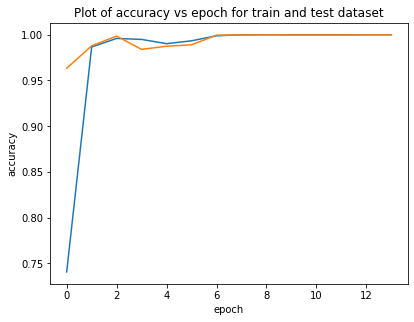

In [40]:
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

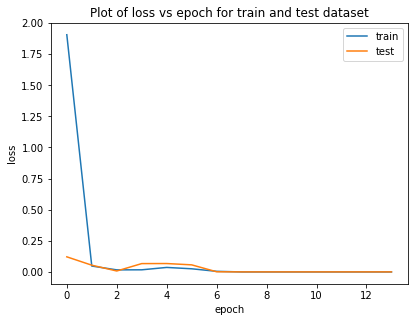

In [41]:
# Plot of loss vs epoch for train and test dataset
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model Evaluation

In [42]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
print(f'Test results - Precision: {test_results[2]*100} - Recall: {test_results[3]*100}%')

207/207 [==============================] - 1s 4ms/step - loss: 3.0546e-04 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000
Test results - Loss: 0.00030546390917152166 - Accuracy: 100.0%
Test results - Precision: 100.0 - Recall: 100.0%


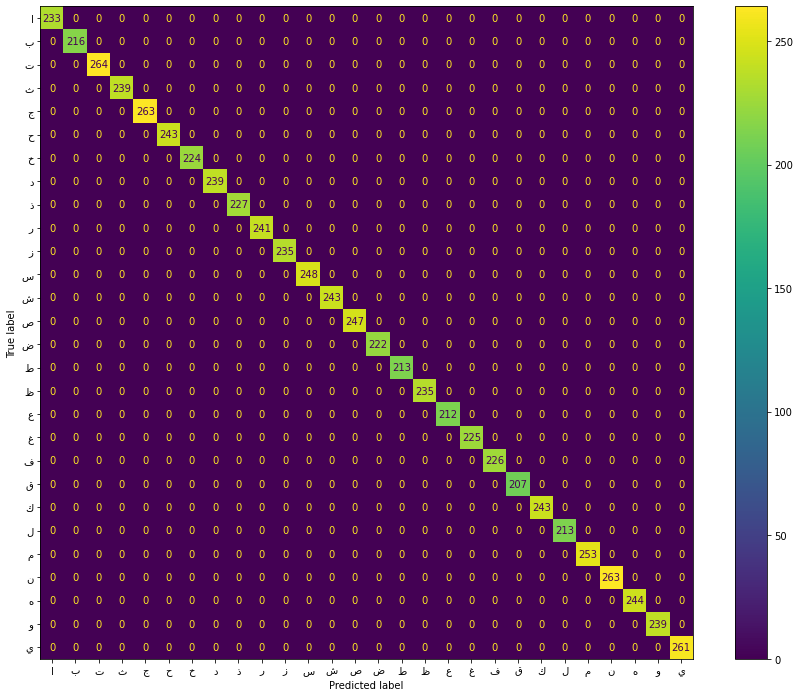

In [43]:
#Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_predictions = model.predict(X_test)
cm=confusion_matrix(y_test.argmax(axis=1),y_predictions.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ar_alphabet)

plt.rcParams["figure.figsize"] = 15, 12
disp.plot()
plt.show()


In [44]:
#Classification Report

from sklearn.metrics import classification_report

report = classification_report(y_test.argmax(axis=1),y_predictions.argmax(axis=1), target_names=ar_alphabet)
print(report)

              precision    recall  f1-score   support

           ا       1.00      1.00      1.00       233
           ب       1.00      1.00      1.00       216
           ت       1.00      1.00      1.00       264
           ث       1.00      1.00      1.00       239
           ج       1.00      1.00      1.00       263
           ح       1.00      1.00      1.00       243
           خ       1.00      1.00      1.00       224
           د       1.00      1.00      1.00       239
           ذ       1.00      1.00      1.00       227
           ر       1.00      1.00      1.00       241
           ز       1.00      1.00      1.00       235
           س       1.00      1.00      1.00       248
           ش       1.00      1.00      1.00       243
           ص       1.00      1.00      1.00       247
           ض       1.00      1.00      1.00       222
           ط       1.00      1.00      1.00       213
           ظ       1.00      1.00      1.00       235
           ع       1.00    

In [45]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle

n_classes = len(ar_alphabet)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(ar_alphabet)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

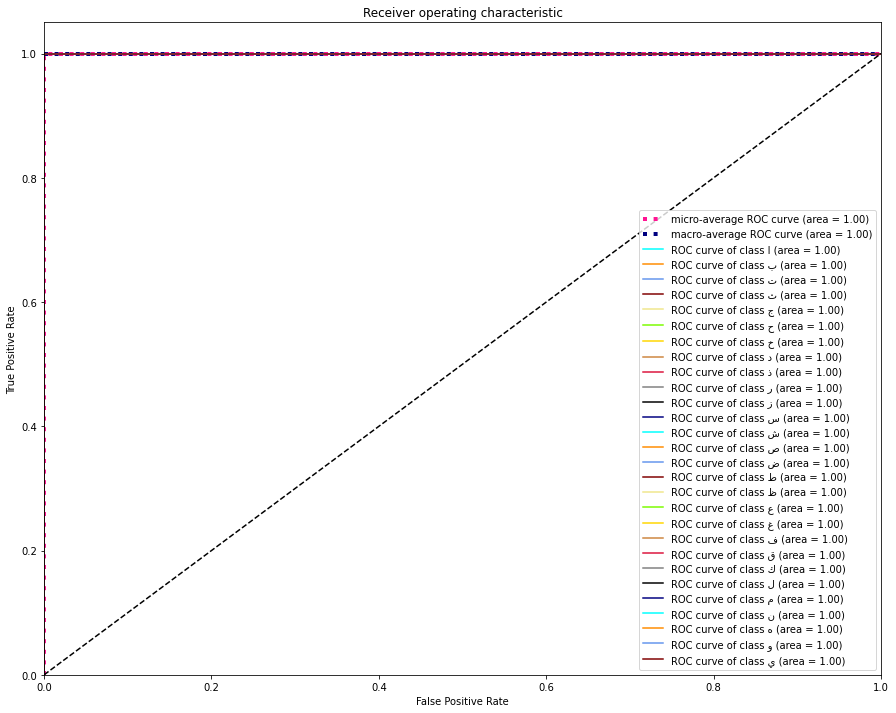

In [46]:
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "maroon","khaki", "lawngreen", "gold", "peru","crimson", "gray", "black", "navy"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label=f"ROC curve of class {ar_alphabet[i]} (area = {roc_auc[i]:0.2f})",
    )

plt.rcParams["figure.figsize"] = 15,12
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [47]:
model_name = 'ArabicAlphabetSL'
model.save(f"{model_name}.h5")

In [48]:
import tensorflow as tf
from tensorflow.keras.models import load_model

keras_model = load_model('/kaggle/working/ArabicAlphabetSL.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()
with open(f'{model_name}.tflite', 'wb') as f:
    f.write(tflite_model)

2022-12-08 17:44:35.689549: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 17:44:35.689918: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-12-08 17:44:35.690031: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-12-08 17:44:35.690478: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 17:44:35.690877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 17:44:35.691193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su